In [8]:
from selenium import webdriver
driver=webdriver.Chrome(executable_path='chromedriver')
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException
from datetime import date
import time
import operator
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
driver.get('https://www.instagram.com/')
wait=WebDriverWait(driver, 5)
username=wait.until(EC.presence_of_element_located((By.XPATH,'//input[@name = "username"]')))
username.send_keys('user_name')
password=wait.until(EC.presence_of_element_located((By.XPATH,'//input[@name = "password"]')))
password.send_keys('password')
button=wait.until(EC.presence_of_element_located((By.XPATH,'//button[@class = "sqdOP  L3NKy   y3zKF     "]')))
button.click()
search=wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "pbgfb Di7vw "]')))
search.click()

In [5]:
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('yCE8d  ')
    for i in names:
        if i.text.startswith('#'):
            continue
        if ("explore/tags" not in str(i.get_attribute("href"))) and "explore/locations" not in str(i.get_attribute("href")):
            l.append(i.get_attribute("href"))
    return l


x=Search('food')[:10]
dic={}
final=[]
global foll
for i in x:
    try:
        driver.get(i)
        time.sleep(4)
        name=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[1]/h2').text
        foll=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span').get_attribute('title').replace(',', '')
        final.append([int(foll), name, i])
    except StaleElementReferenceException:
        continue
final.sort(reverse=True)
# print(d)
final=final[:5]
# final=[]
for i in final:
    print(i[1], i[0]) 

foodys 8978087
love_food 6782432
yourfoodlab 1461935
mumbaifoodie 464836
foodtalkindia 302780


In [9]:
today =str(date.today())
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('Ap253')
    return names[0]

count=0;
count_posts=[]
for i in final:
    driver.get(i[2])
    current=driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    time.sleep(4)
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(6)
                                       ## finding time tag of the post after clicking the post
        try:
            date=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/div[2]/a/time')
#                              /html/body/div[4]/div[2]/div/article/div[3]/div[2]/a/time
                                          ## getting date from time tag
        except NoSuchElementException:
            date=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/div[2]/a/time')
        post_date=date.get_attribute("datetime")[:10]
        
                                         ## taking decisions to decide for previous 3 days
        
        if int(today[:4])==int(post_date[:4]) and int(today[5:7])==int(post_date[5:7]):
            
            if(int(today[8:10])-int(post_date[8:10])<=3):

                count+=1
            
            else:
                count_posts.append([count,i[1]])
                break
        
         ### finding close button
        
        close=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
        close.click()
        time.sleep(3)

            
for row in count_posts:
    print(row[1]," ",row[0])

driver.get("https://www.instagram.com/")


foodys   9
love_food   18
yourfoodlab   21
mumbaifoodie   27
foodtalkindia   27


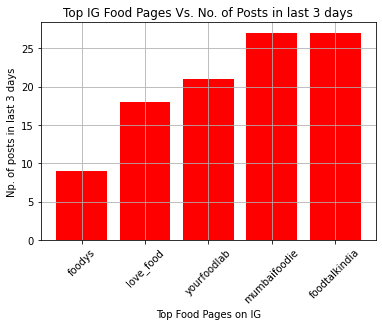

In [10]:
count_posts=np.array(count_posts)

Y=np.array(count_posts[:,0],dtype=int)

X=count_posts[:,1]
plt.xlabel("Top Food Pages on IG")

plt.ylabel("Np. of posts in last 3 days")

plt.title("Top IG Food Pages Vs. No. of Posts in last 3 days")
plt.xticks(rotation=45)
plt.bar(X,Y, color='Red')
plt.grid()
plt.show()
driver.get("https://www.instagram.com/")

In [11]:
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('Ap253')
    return names[0]

count=0;
words=np.array([])
for i in final:
    driver.get(i[2])
    current=driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    time.sleep(4)
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')[:10]
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(6)
        try:
            hashtags=driver.find_elements_by_class_name("xil3i")
        except NoSuchElementException:
            pass
        
        for hashtag in hashtags:
            if hashtag.text=='':
                continue
            words=np.append(words, hashtag.text) 
        
        try:
            close=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
        except NoSuchElementException:
            close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)

for i in words:
    print(i)
    
driver.get("https://www.instagram.com/")

#foodys
#insideout
#zedd
#music
#foodys
#recipe
#foodie
#comfortfood
#streetfood
#indiancuisine
#recipe
#foodie
#comfortfood
#chinesefood
#streetfood
#sanjyotkeer
#foodporn
#MorphyRichards
#CookItMyWay
#CookItMyWay
#recipe
#foodie
#foodporn
#diwali
#diwalicelebration
#kajukatli
#foodrecipes
#streetfood
#sweet
#sweetlover
#indiancuisine
#jalandhar
#tikkiyanwalachowk
#TakeNoChances
#GodrejViroShield
#Recipe
#foodie
#cake
#streetfood
#streetstyle
#cakesofinstagram
#cake
#baking
#bakingtime
#streetfood
#sanjyotkeer
#cakestagram
#cakelover
#TwistedRecipe
#MumbaiFoodie
#EllesCakeStories
#mumbaifoodie
#mumbaifood
#fondantdecoration
#things2doinmumbai
#dessert
#mumbaifoodblogger
#fondant
#cakes
#foodiliciousmumbai
#munchymumbai
#cake
#custommade
#mumbaiblogger
#mumbaikar
#instamumbai
#MumbaiFoodie
#MexicanFood
#mumbaifoodie
#mumbaifood
#foodofmumbai
#things2doinmumbai
#texmex
#mumbaifoodblogger
#tacotuesday
#foodbossindia
#foodiliciousmumbai
#taco
#mexican
#mumbaifoodies
#mumbaiblogger
#mumbai

In [12]:
(unique, counts) = np.unique(words, return_counts=True)
temp=np.argsort(-counts)
unique=unique[temp]
counts=counts[temp]
for i in range(len(unique)):
    print(unique[i], counts[i])
# print(type(unique))

#mumbaifoodie 10
#MumbaiFoodie 9
#mumbaifood 9
#mumbaifoodblogger 9
#foodiliciousmumbai 9
#things2doinmumbai 8
#foodofmumbai 8
#instamumbai 7
#mumbaifoodlovers 7
#mumbaikar 7
#munchymumbai 7
#mumbaiblogger 7
#indianfoodbloggers 6
#mumbaifoodies 6
#foodbossindia 6
#HendricksMidsummer 5
#streetfood 5
#cake 4
#foodie 4
#recipe 3
#HendricksGin 3
#mumbaifoodicious 3
#indiancuisine 2
#foodporn 2
#comfortfood 2
#diwali 2
#sanjyotkeer 2
#CookItMyWay 2
#foodys 2
#giftingideas 1
#drinkstagram 1
#drinks🍹 1
#gift 1
#foodrecipes 1
#fondantdecoration 1
#gifting 1
#fondant 1
#AgesAhead 1
#idli 1
#tikkiyanwalachowk 1
#texmex 1
#tacotuesday 1
#taco 1
#sweetlover 1
#sweet 1
#streetstyle 1
#giveaway 1
#spirit 1
#pizzahut 1
#music 1
#drinkspiration 1
#mexican 1
#kajukatli 1
#jalandhar 1
#insideout 1
#sonamkapoor 1
#drinksofinstagram 1
#diwalihamper 1
#drink 1
#Sponsored 1
#Speyside 1
#SouthIndianFood 1
#Scotland 1
#ScotchWhisky 1
#Recipe 1
#PizzaHutIndia 1
#MorphyRichards 1
#MomsCheesecakes 1
#MexicanFood

In [13]:
import pandas as pd
df = pd.DataFrame({"Frequency" : counts, "Hashtag" : unique})
df.to_csv("submission2.csv", index=False)
df

,Frequency,Hashtag
0,10,#mumbaifoodie
1,9,#MumbaiFoodie
2,9,#mumbaifood
3,9,#mumbaifoodblogger
4,9,#foodiliciousmumbai
...,...,...
103,1,#WhiskyTasting
104,1,#WhiskyLovers
105,1,#WhiskyGram
106,1,#cakesofinstagram


In [14]:
print(unique[0])

#mumbaifoodie


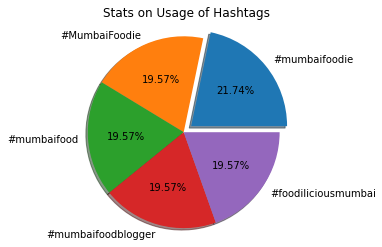

In [15]:
plt.pie(counts[:5],labels=unique[:5],autopct="%.2f%%", explode=[0.1,0,0,0,0],shadow=True)
plt.axis("equal")
plt.title("Stats on Usage of Hashtags")
plt.show()

In [16]:
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('Ap253')
    return names[0]

count=0;
likesTot=np.empty((0,2), int)
# likes_handle=0
for i in final:
    likes_handle=0
    driver.get(i[2])
    current=driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    time.sleep(4)
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')[:10]
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(6)
        try:
            try:
                likes=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/button/span').text
            except NoSuchElementException:
                likes=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span').text
#             print(likes)
            likes=likes.strip().replace(',','')
            likes_handle+=int(likes)
            
        except NoSuchElementException:
            try:
                views=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/span/span')
            except NoSuchElementException:
                views=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/span/span')
            views.click()
            try:
                likes=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span').text
            except NoSuchElementException:
                likes=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span').text
            likes=likes.strip().replace(",", '')
            likes_handle+=int(likes)
            try:
                driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[1]').click()
            except NoSuchElementException:
                driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/div[1]').click()
 
        try:
            close=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
        except NoSuchElementException:
            close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)
#     print(i[1], likes_handle)
    likesTot=np.append(likesTot, np.array([[i[1], likes_handle]]), axis=0)

for i in likesTot:
    print(i[0], i[1])
    
driver.get("https://www.instagram.com/")

foodys 199533
love_food 113637
yourfoodlab 206703
mumbaifoodie 25996
foodtalkindia 4600


In [17]:
print('Average likes on a post of each food page:\n')
for i in likesTot:
    print(i[0], int(i[1])//10)

Average likes on a post of each food page:

foodys 19953
love_food 11363
yourfoodlab 20670
mumbaifoodie 2599
foodtalkindia 460


In [18]:
print('Ratio of Each handle (Followers / Average likes):\n')
ratioarr=np.array([])
for i in range(len(likesTot)):
    followers=int(final[i][0])
    avg=int(likesTot[i][1])//10
    ratio=float(format(followers/avg,".2f"))
    ratioarr=np.append(ratioarr, ratio)
    print(likesTot[i][0], ratio)

Ratio of Each handle (Followers / Average likes):

foodys 449.96
love_food 596.89
yourfoodlab 70.73
mumbaifoodie 178.85
foodtalkindia 658.22


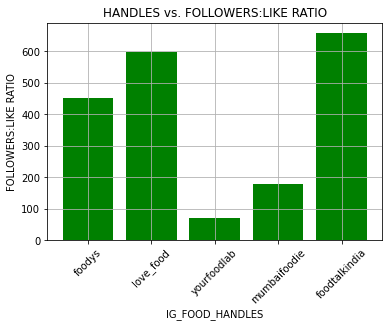

In [19]:
handles=likesTot[:,0]     
plt.bar(handles,ratioarr,color="green")
plt.title("HANDLES vs. FOLLOWERS:LIKE RATIO")
plt.xlabel("IG_FOOD_HANDLES")
plt.ylabel("FOLLOWERS:LIKE RATIO")
plt.xticks(rotation=45)
plt.grid()
plt.show()